CIFAR10 models adopted from https://github.com/huyvnphan/PyTorch_CIFAR10

In [ ]:
#  Colab only
from google.colab import drive
%matplotlib inline


drive.mount("/content/drive")

# Base Imports

In [ ]:
import sys
import torch
from torchvision.datasets import CIFAR10, MNIST

PATH = "/content/drive/My Drive/Colab Notebooks/EECS553ML_reproduce/"
sys.path.append(PATH)

In [ ]:
import dataset


dataset.MODEL = "ResNet-18"
DATA = MNIST
#DATA = CIFAR10

# Model

In [ ]:
if DATA is CIFAR10:
    import PyTorch_CIFAR10.cifar10_models.resnet as resnet
    model = resnet.resnet18(pretrained=True)
else:
    import resnet18 as resnet
    model = resnet.ResNet18(size_for_cifar=False)
    model.load_state_dict(torch.load(PATH + "mnist_resnet18_model.t7"))

model.eval()

ResNet18(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fa

## Model Accuracy

In [ ]:
#### Import data from Keras
import tensorflow.keras as keras
from dataset import Dataset


ds = Dataset(model, DATA)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
print("Accuracy of the network on test images:", 
      ds.accuracy_pytorch())

Accuracy of the network on test images: 0.1438


In [ ]:
print(f"Model accuracy:", ds.accuracy())

Model accuracy: 0.993


K = 8
Prediction time for batch size 8: 0.383485 seconds
100% completed
Time: 116.122229 seconds
K = 12
Prediction time for batch size 12: 0.573400 seconds
100% completed
Time: 175.784068 seconds


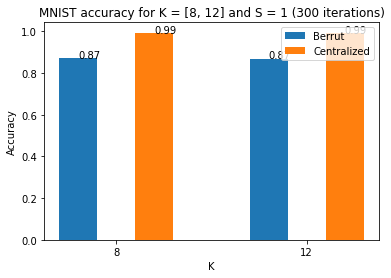

In [ ]:
ds.plot_K(S=1, K_list=[8, 12])

K = 8
Prediction time for batch size 8: 0.411541 seconds
100% completed
Time: 127.337638 seconds


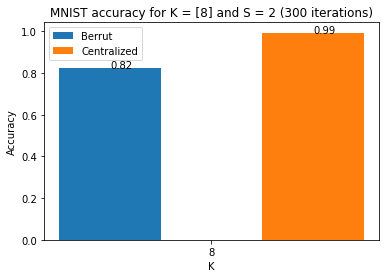

In [ ]:
ds.plot_K(S=2)

K = 8
Prediction time for batch size 8: 0.421912 seconds
100% completed
Time: 135.276489 seconds


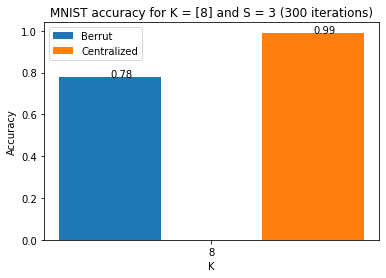

In [ ]:
ds.plot_K(S=3)